<a href="https://colab.research.google.com/github/nishas28/cuddle_thread/blob/master/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded =  files.upload()

Saving creditcard.csv to creditcard.csv


In [2]:
#using pandas to load dataset from csv file
import pandas as pd

In [3]:
data = pd.read_csv('creditcard.csv')

##STEP 1 & 2: Data cleaning & data preprocessing

Explore, visualize/organize and clean the dataset

In [4]:
print(data.columns)
print(data.shape)

#class = 1 implies fradulent transaction
#class = 0 implies valid transaction

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [6]:
data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(28481, 31)


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12155 entries, 92862 to 33412
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12155 non-null  int64  
 1   V1      12155 non-null  float64
 2   V2      12155 non-null  float64
 3   V3      12155 non-null  float64
 4   V4      12155 non-null  float64
 5   V5      12155 non-null  float64
 6   V6      12155 non-null  float64
 7   V7      12155 non-null  float64
 8   V8      12155 non-null  float64
 9   V9      12155 non-null  float64
 10  V10     12155 non-null  float64
 11  V11     12155 non-null  float64
 12  V12     12155 non-null  float64
 13  V13     12155 non-null  float64
 14  V14     12155 non-null  float64
 15  V15     12155 non-null  float64
 16  V16     12155 non-null  float64
 17  V17     12155 non-null  float64
 18  V18     12155 non-null  float64
 19  V19     12155 non-null  float64
 20  V20     12155 non-null  float64
 21  V21     12155 non-null  float64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000
mean,47469.836857,-0.268581,-0.023377,0.675211,0.169720,-0.278986,0.079227,-0.119712,0.060304,-0.073152,-0.006608,0.222516,-0.020488,-0.013886,0.026015,0.204707,-0.011998,0.043897,-0.086445,-0.015441,0.048117,-0.023177,-0.115250,-0.028369,0.009875,0.135883,0.026232,0.003075,0.000897,95.018716,0.002304
std,19228.377982,1.883364,1.733838,1.291780,1.348154,1.371493,1.323549,1.240084,1.272501,1.115223,1.108529,1.060144,1.070018,1.015323,0.960161,0.928829,0.902028,0.947360,0.844645,0.814656,0.768623,0.817433,0.653865,0.675841,0.595754,0.437010,0.489877,0.394573,0.313496,247.218262,0.047942
min,0.000000,-28.344757,-40.978852,-28.923756,-4.759357,-20.346228,-17.574835,-19.210896,-37.353443,-7.570322,-13.386683,-2.835059,-17.131301,-3.604137,-18.049998,-3.625016,-12.391346,-22.608868,-9.498746,-4.021062,-10.069499,-12.820166,-8.887017,-25.356744,-2.761047,-6.035054,-1.476146,-7.463188,-8.478686,0.000000,0.000000
25%,35692.000000,-1.008240,-0.595452,0.174985,-0.700950,-0.911102,-0.658585,-0.601490,-0.134203,-0.704254,-0.474509,-0.546684,-0.427385,-0.691645,-0.345333,-0.342678,-0.488996,-0.397961,-0.564051,-0.508243,-0.168692,-0.225764,-0.544114,-0.175250,-0.329083,-0.131326,-0.322237,-0.061821,-0.004734,6.990000,0.000000
50%,49144.000000,-0.260929,0.093576,0.756604,0.203483,-0.323480,-0.162757,-0.059591,0.080010,-0.135783,-0.089072,0.137871,0.130545,-0.017034,0.057879,0.317077,0.077076,-0.016724,-0.082466,-0.022823,-0.021697,-0.055749,-0.088627,-0.050210,0.069697,0.169378,-0.065443,0.011714,0.023361,25.900000,0.000000
75%,63211.500000,1.156338,0.743194,1.368571,1.029623,0.242805,0.484005,0.411171,0.375220,0.496915,0.453874,1.044803,0.635169,0.657783,0.460495,0.879646,0.538227,0.439584,0.387935,0.484739,0.171537,0.118503,0.310457,0.080132,0.408983,0.422815,0.288996,0.085740,0.078352,85.680000,0.000000
max,76233.000000,1.613335,15.598193,4.226108,11.927512,24.363532,13.026747,21.246173,18.329406,10.313974,12.660426,11.228470,3.607076,3.685570,6.441021,4.279110,3.673225,7.454785,3.458055,3.809136,16.178535,27.202839,4.359627,17.297845,4.016342,2.732898,3.040808,5.052705,6.711628,6950.510000,1.000000


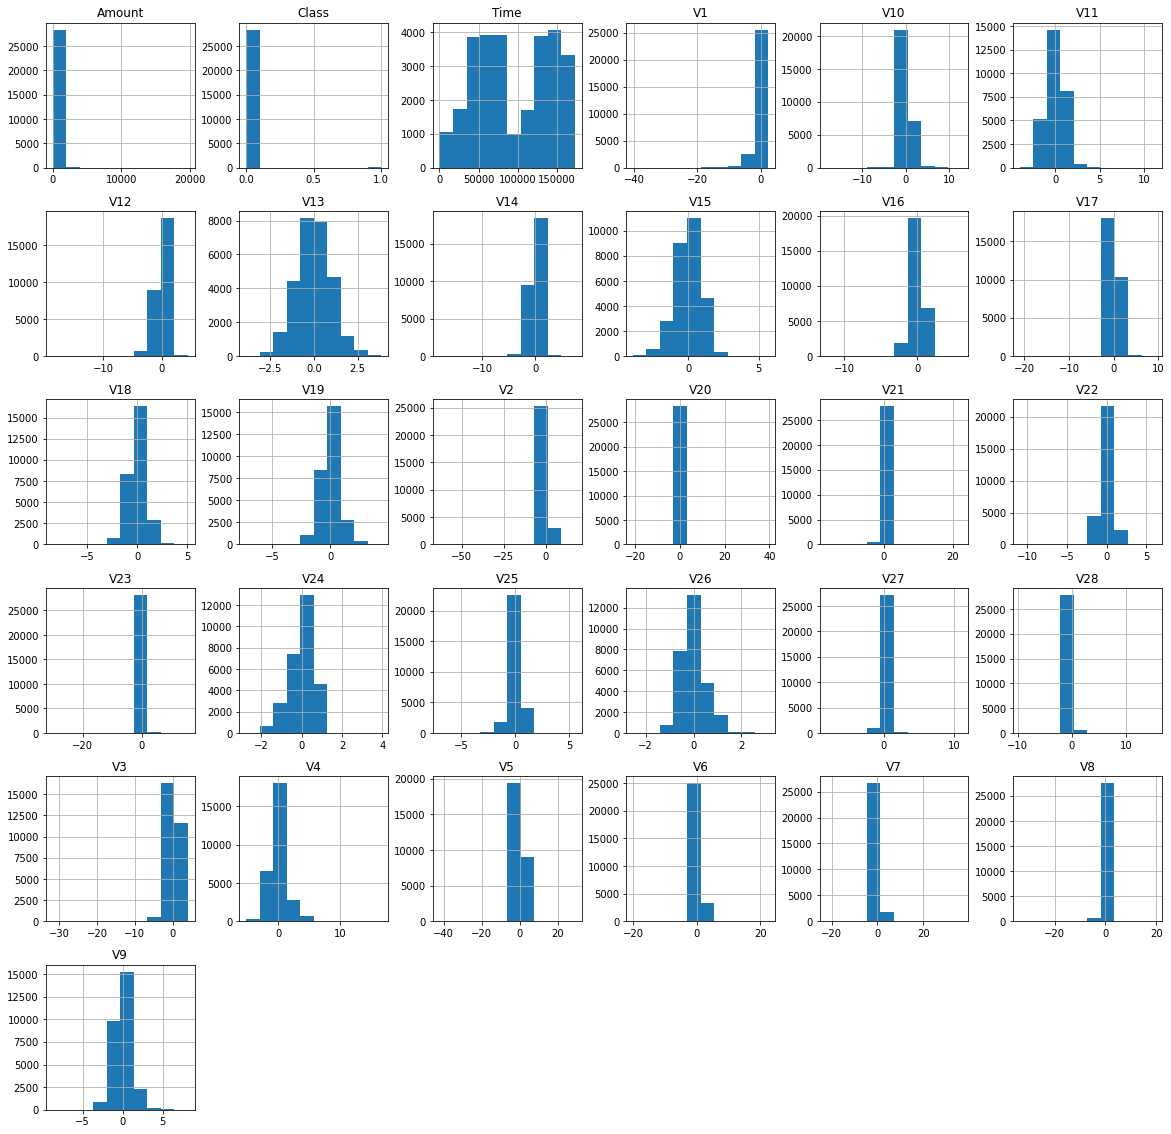

In [7]:
data.hist(figsize = (20, 20))

import matplotlib.pyplot as plt
plt.show()

In [8]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
127467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
137900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21513,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
134700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
240932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No NULL values present

In [10]:
#determining frad cases in our considered dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

fraction = float(len(fraud)) / float(len(valid))
print(fraction)

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


##STEP 3, 4 & 5: Filter, evaluate and build the model

In [11]:
columns = data.columns.tolist() #get all columns form dataframe

columns = [c for c in columns if c not in ["Class"]] #filter the columns to get only the data we require

target = "Class" #since we predict on based on Class

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [15]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation forest": IsolationForest(max_samples=len(X),
                                        contamination = fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = fraction)
}

In [14]:
n_outliers = len(fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    score_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)

  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred != Y).sum()

# Final step: Analysis outcome

In [16]:
  print('{}: {}'.format(clf_name,n_errors))
  print(accuracy_score(Y, y_pred))
  print(classification_report(Y, y_pred))

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

